# Adding more data

This notebook is used to compare the baseline run (70) with an updated run (72), which has the following changes:

* New prepped_data, more history, removed IBES columns
* Training Period Length variable added


# Conclusion

Seems like there is no problems with the new data, and that there really isn't much of a different with a six year or infinite-length training period.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,False,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"


In [3]:
run1 = RunManager('StatArbStrategy', 'run_0070', test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0072', test_periods=0)

In [4]:
run1.import_return_frame()
run2.import_return_frame()

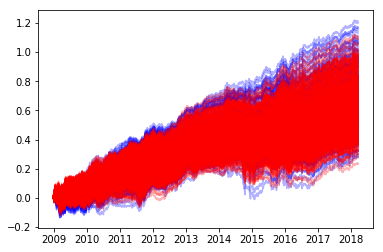

In [5]:
# Aligning both runs
plt.figure()
plt.plot(run1.returns.cumsum(), 'b', alpha=0.3)
plt.plot(run2.returns.loc[run1.returns.index].cumsum(), 'r', alpha=0.3)
plt.show()

In [6]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,252,1.163045,0.059146,-999.0
1,holding_period,5,252,1.084491,0.060076,-999.0
2,holding_period,7,252,1.010586,0.060942,-999.0
3,holding_period,9,252,0.950702,0.061189,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",336,1.126854,0.065472,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",336,1.141162,0.066271,-999.0
6,model,{u'type': u'reg'},336,0.888602,0.049273,-999.0
7,per_side_count,10,336,1.205733,0.057087,-999.0
8,per_side_count,20,336,1.029833,0.061477,-999.0
9,per_side_count,30,336,0.921052,0.062451,-999.0


In [7]:
comb = CombinationSearch()
comb.add_run(run2)
comb.params['training_epochs'] = 10
comb.start()

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [03:25<00:00, 20.81s/it]


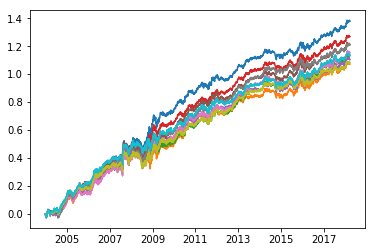

In [9]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [11]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)


Qtr          1         2         3         4      year
Year                                                  
2003       NaN       NaN       NaN       NaN       NaN
2004  0.015884 -0.000201  0.027607  0.068824  0.112114
2005  0.026610  0.022794  0.035806  0.011785  0.096995
2006  0.049567  0.034983  0.054036  0.017386  0.155972
2007  0.027163  0.021489  0.076651 -0.002893  0.122410
2008  0.035522 -0.046527  0.073011  0.097362  0.159368
2009  0.016678  0.064132 -0.009753  0.027178  0.098235
2010  0.058961  0.006331  0.064927 -0.004037  0.126182
2011  0.047860  0.010870 -0.004492  0.061410  0.115648
2012 -0.017065 -0.007125  0.029863  0.057658  0.063331
2013 -0.004963  0.046914  0.022268  0.006329  0.070549
2014  0.046149 -0.010171 -0.033257  0.013200  0.015922
2015  0.011137  0.013828 -0.011894  0.067829  0.080900
2016 -0.003151  0.008309  0.012872  0.038137  0.056168
2017  0.016052  0.034231  0.000221  0.014408  0.064913
2018  0.038358       NaN       NaN       NaN  0.038358


In [28]:
comb2 = CombinationSearch()
comb2.params['training_periods'] = 4
comb2.params['training_epochs'] = 10
comb2.add_run(run2)
comb2.start()

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...


100%|██████████| 10/10 [01:39<00:00,  9.81s/it]


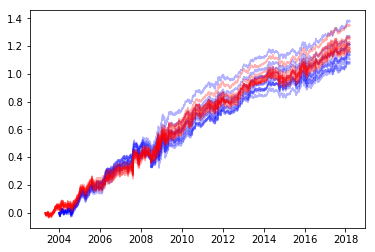

In [29]:
inds = comb2.best_results_returns.dropna().index

plt.figure()
plt.plot(comb.best_results_returns.loc[inds].cumsum(), 'b', alpha=0.3)
plt.plot(comb2.best_results_returns.loc[inds].cumsum(), 'r', alpha=0.3)
plt.show()

In [30]:
stats = get_stats(comb.best_results_returns.dropna())

In [31]:
stats2 = get_stats(comb2.best_results_returns.dropna())

In [32]:
stats.loc['Sharpe'].mean()

1.0706099999999998

In [33]:
stats2.loc['Sharpe'].mean()

1.06532